In [1]:
import numpy as np
import time
import pickle
import matplotlib.pyplot as plt

import os
import sys
import numpy as np
import matplotlib.pyplot as plt
sys.path.append(r"C:\Document\Serieux\Travail\python_work\cEBNM_torch\py")
sys.path.append(r"C:\Document\Serieux\Travail\python_work\cEBNM_torch\py\ebnm_solver")
sys.path.append(r"C:\Document\Serieux\Travail\python_work\cEBNM_torch\py\numerical_routine")

from empirical_mdn import * 

# Add the path to utils.py
sys.path.append(r"c:\Document\Serieux\Travail\python_work\cEBNM_torch\py")
from cEBMF import *
def scaling_exp(noise_level=1, seed=1, nrow=1000):
    np.random.seed(seed)

    # Generate random coordinates
    x = np.random.rand(nrow)
    y = np.random.rand(nrow)
    X = np.column_stack((x, y))  # This will be your 'df'

    # Generate f matrix (3 x 200)
    f = np.empty((3, 200))
    for i in range(200):
        t1 = np.random.choice([0, 1])
        t2 = np.random.choice([0, 1])
        f[0, i] = t1 * np.random.randn()
        f[1, i] = t2 * np.random.randn()
        f[2, i] = t2 * np.random.randn()

    # Initialize L matrix
    L = np.empty((nrow, 3))

    for i in range(nrow):
        if (x[i] < 0.33 and y[i] < 0.33) or \
           (0.33 < x[i] < 0.66 and 0.33 < y[i] < 0.66) or \
           (x[i] > 0.66 and y[i] > 0.66):
            L[i, :] = [1, 0, 0]
        elif (x[i] < 0.33 and y[i] > 0.66) or \
             (0.33 < x[i] < 0.66 and y[i] < 0.33) or \
             (x[i] > 0.66 and 0.33 < y[i] < 0.66):
            L[i, :] = [0, 1, 0]
        else:
            L[i, :] = [0, 0, 1]

    # Generate noisy observations
    Z = L @ f + np.random.normal(scale=noise_level, size=(nrow, f.shape[1]))

    return Z, X  # X is a (nrow x 2) NumPy array with x and y


In [ ]:
save_path = "C:\Document\Serieux\Travail\Data_analysis_and_papers\cEBMF_submission\ICML_submission\scaling_exp_res\1000.pkl"

timings = []
if os.path.exists(save_path):
    with open(save_path, "rb") as f:
        timings = pickle.load(f)

In [ ]:

for i in range(10 - len(timings)):

    Z, coords = scaling_exp(nrow=1000)
    print(Z.shape)     # (1000, 200)
    print(coords.shape)  # (1000, 2)
    
    start = time.time()
    mycebmf= cEBMF(data= Z,
               prior_L= "emdn",
               X_l= coords,
               K=3)
    mycebmf.init_LF()
    for i in range(1):
        mycebmf.iter( )
    elapsed = time.time() - start
    timings.append(elapsed)
    print(f"Run {len(timings)} took {elapsed:.4f} seconds")
    with open(save_path, "wb") as f:
        pickle.dump(timings, f)

(10000, 200)
(10000, 2)
Epoch 10/50, Loss: 0.2815
Epoch 20/50, Loss: 0.1676
Epoch 30/50, Loss: 0.0431
Epoch 40/50, Loss: -0.0503
Epoch 50/50, Loss: -0.0685
Epoch 10/50, Loss: 0.3596
Epoch 20/50, Loss: 0.0852
Epoch 30/50, Loss: -0.0320
Epoch 40/50, Loss: -0.0511
Epoch 50/50, Loss: -0.0415
Epoch 10/50, Loss: 0.4214
Epoch 20/50, Loss: 0.0022
Epoch 30/50, Loss: -0.0298
Epoch 40/50, Loss: -0.0385
Epoch 50/50, Loss: -0.0429
Run 1 took 36.0390 seconds
(10000, 200)
(10000, 2)
Epoch 10/50, Loss: 0.2252
Epoch 20/50, Loss: 0.0243
Epoch 30/50, Loss: -0.0532
Epoch 40/50, Loss: -0.0691
Epoch 50/50, Loss: -0.0716
Epoch 10/50, Loss: 0.4478
Epoch 20/50, Loss: -0.0102
Epoch 30/50, Loss: -0.0434
Epoch 40/50, Loss: -0.0513
Epoch 50/50, Loss: -0.0571
Epoch 10/50, Loss: 0.2501
Epoch 20/50, Loss: 0.0778
Epoch 30/50, Loss: 0.0319
Epoch 40/50, Loss: -0.0053
Epoch 50/50, Loss: -0.0353
Run 2 took 35.1724 seconds
(10000, 200)
(10000, 2)
Epoch 10/50, Loss: 0.1331
Epoch 20/50, Loss: -0.0175
Epoch 30/50, Loss: -0.05

: 

In [ ]:
save_path = "C:\Document\Serieux\Travail\Data_analysis_and_papers\cEBMF_submission\ICML_submission\scaling_exp_res\10000.pkl"

timings = []
if os.path.exists(save_path):
    with open(save_path, "rb") as f:
        timings = pickle.load(f)

In [ ]:

for i in range(10 - len(timings)):

    Z, coords = scaling_exp(nrow=10000)
    print(Z.shape)     # (1000, 200)
    print(coords.shape)  # (1000, 2)
    
    start = time.time()
    mycebmf= cEBMF(data= Z,
               prior_L= "emdn",
               X_l= coords,
               K=3)
    mycebmf.init_LF()
    for i in range(1):
        mycebmf.iter( )
    elapsed = time.time() - start
    timings.append(elapsed)
    print(f"Run {len(timings)} took {elapsed:.4f} seconds")
    with open(save_path, "wb") as f:
        pickle.dump(timings, f)

In [ ]:
save_path = "C:\Document\Serieux\Travail\Data_analysis_and_papers\cEBMF_submission\ICML_submission\scaling_exp_res\100000.pkl"

timings = []
if os.path.exists(save_path):
    with open(save_path, "rb") as f:
        timings = pickle.load(f)

In [ ]:
 
for i in range(10 - len(timings)):

    Z, coords = scaling_exp(nrow=100000)
    print(Z.shape)     # (1000, 200)
    print(coords.shape)  # (1000, 2)
    
    start = time.time()
    mycebmf= cEBMF(data= Z,
               prior_L= "emdn",
               X_l= coords,
               K=3)
    mycebmf.init_LF()
    for i in range(1):
        mycebmf.iter( )
    elapsed = time.time() - start
    timings.append(elapsed)
    print(f"Run {len(timings)} took {elapsed:.4f} seconds")
    with open(save_path, "wb") as f:
        pickle.dump(timings, f)

In [ ]:
save_path = "C:\Document\Serieux\Travail\Data_analysis_and_papers\cEBMF_submission\ICML_submission\scaling_exp_res\1000000.pkl"

timings = []
if os.path.exists(save_path):
    with open(save_path, "rb") as f:
        timings = pickle.load(f)

In [ ]:
 
for i in range(10 - len(timings)):

    Z, coords = scaling_exp(nrow=100000)
    print(Z.shape)     # (1000, 200)
    print(coords.shape)  # (1000, 2)
    
    start = time.time()
    mycebmf= cEBMF(data= Z,
               prior_L= "emdn",
               X_l= coords,
               K=3)
    mycebmf.init_LF()
    for i in range(1):
        mycebmf.iter( )
    elapsed = time.time() - start
    timings.append(elapsed)
    print(f"Run {len(timings)} took {elapsed:.4f} seconds")
    with open(save_path, "wb") as f:
        pickle.dump(timings, f)

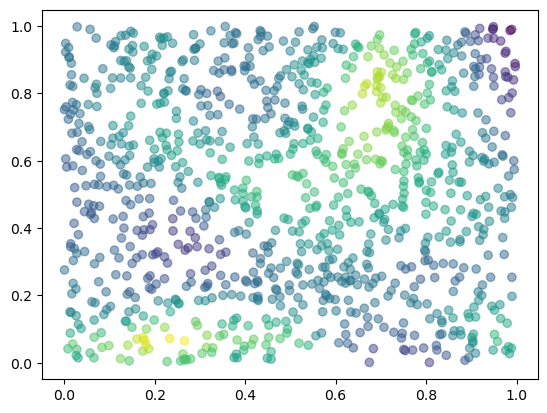

In [ ]:
plt.scatter(coords[:,0], coords[:,1], alpha=0.5,
            c= mycebmf.L [:,2] )
 

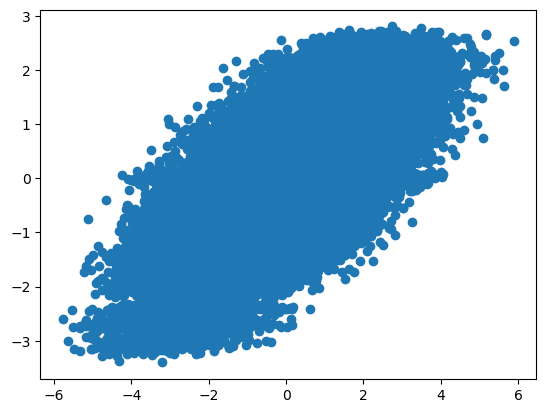

In [ ]:
plt.scatter (Z, mycebmf.L@ mycebmf.F.T) 